# **Projeto C209**

Integrantes : Eduardo Karpfenstein GES 77                                                                                      Inajaha Costa Vilas Boas GES 318

A remoção de ruídos de imagens é uma área de pesquisa que evoluiu ao longo do tempo, com contribuições de vários pesquisadores e instituições ao redor do mundo. Não há um único indivíduo que seja creditado como o criador dessa técnica, pois ela é resultado do progresso contínuo na área de processamento de imagens e visão computacional.

A técnica de remoção de ruídos usando média aritmética consiste em suavizar uma imagem através da substituição de cada pixel pela média dos valores de intensidade dos pixels ao seu redor.

Importando bibliotecas.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import random

Criando função para geração de ruidos em uma imagem.

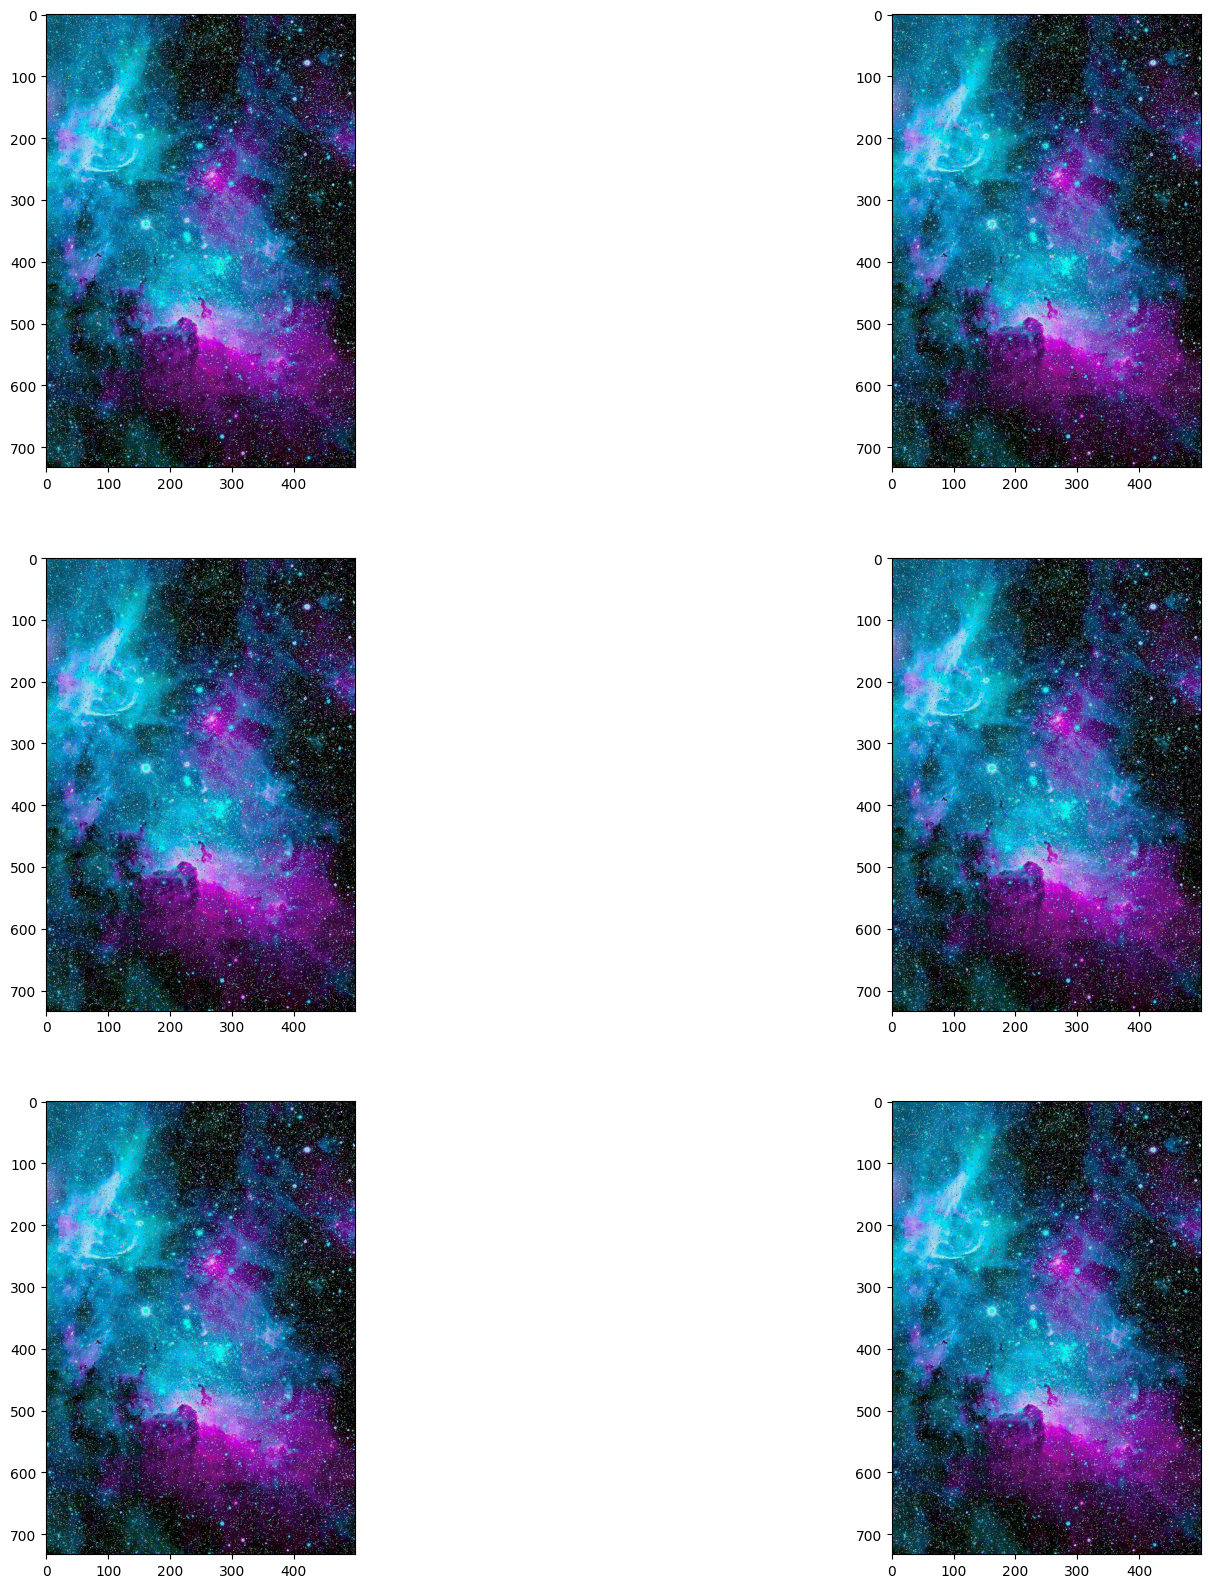

In [4]:

# Abre a image
img = Image.open('galaxia_original.jpeg')

# Cria cópias da imagem original para adicionar diferentes ruídos
img_gaus_1 = img.copy()
img_gaus_2 = img.copy()
img_gaus_3 = img.copy()
img_gaus_4 = img.copy()
img_gaus_5 = img.copy()
img_gaus_6 = img.copy()

# Função para adicionar ruído gaussiano
def add_gaussian_noise(image):
    draw = ImageDraw.Draw(image)
    width, height = image.size
    for _ in range(20000):  # Adiciona ruído em 20000 pixels
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        draw.point((x, y), fill=(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))

# Adiciona ruído a cada imagem
add_gaussian_noise(img_gaus_1)
add_gaussian_noise(img_gaus_2)
add_gaussian_noise(img_gaus_3)
add_gaussian_noise(img_gaus_4)
add_gaussian_noise(img_gaus_5)
add_gaussian_noise(img_gaus_6)


# Salva as novas imagens com ruídos
img_gaus_1.save('imagem_com_ruido_gaussiano1.jpg')
img_gaus_2.save('imagem_com_ruido_gaussiano2.jpg')
img_gaus_3.save('imagem_com_ruido_gaussiano3.jpg')
img_gaus_4.save('imagem_com_ruido_gaussiano4.jpg')
img_gaus_5.save('imagem_com_ruido_gaussiano5.jpg')
img_gaus_6.save('imagem_com_ruido_gaussiano6.jpg')


plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
plt.imshow(img_gaus_1)

plt.subplot(3,2,2)
plt.imshow(img_gaus_2)

plt.subplot(3,2,3)
plt.imshow(img_gaus_3)

plt.subplot(3,2,4)
plt.imshow(img_gaus_4)

plt.subplot(3,2,5)
plt.imshow(img_gaus_5)

plt.subplot(3,2,6)
plt.imshow(img_gaus_6)



Retirando o ruindo das imagens e comparando com a original

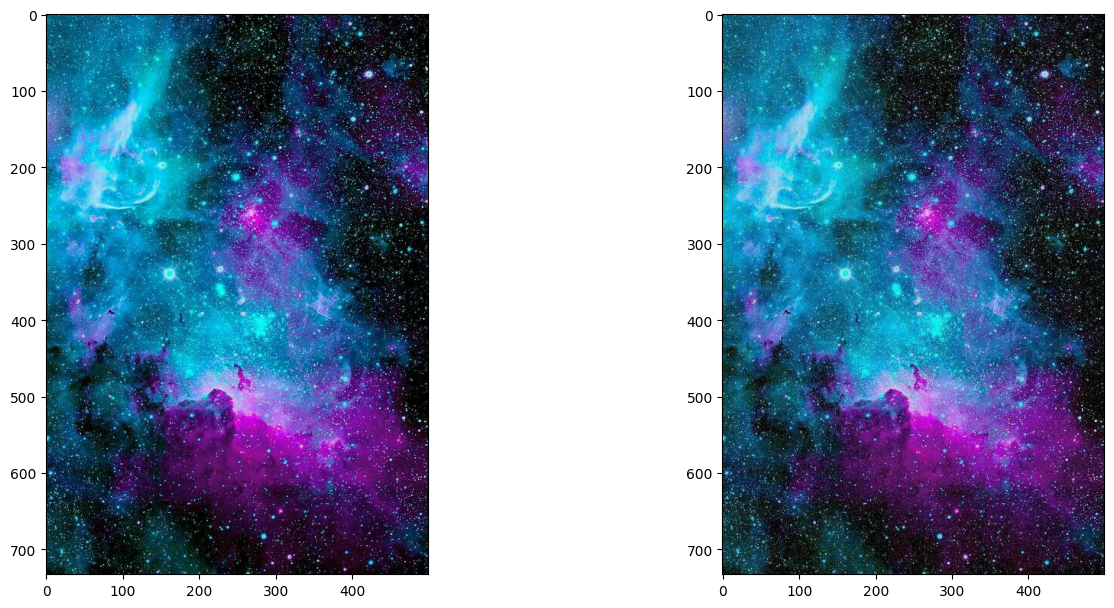

In [5]:

#iniciando as imagens ('passa o nome do arquivo como esta salvo')
galaxy_1 = np.array(Image.open('imagem_com_ruido_gaussiano1.jpg'))
galaxy_2 = np.array(Image.open('imagem_com_ruido_gaussiano2.jpg'))
galaxy_3 = np.array(Image.open('imagem_com_ruido_gaussiano3.jpg'))
galaxy_4 = np.array(Image.open('imagem_com_ruido_gaussiano4.jpg'))
galaxy_5 = np.array(Image.open('imagem_com_ruido_gaussiano5.jpg'))
galaxy_6 = np.array(Image.open('imagem_com_ruido_gaussiano6.jpg'))

#fazendo a soma artmética, tem que colocar float 
galaxy_avg = ( galaxy_1.astype(np.float64)
            + galaxy_2.astype(np.float64)
            + galaxy_3.astype(np.float64)
            + galaxy_4.astype(np.float64)
            + galaxy_5.astype(np.float64) 
            + galaxy_6.astype(np.float64)) / 6
galaxy_avg = galaxy_avg.astype(np.uint8) #aqui muda para uint novamente
Image.fromarray(galaxy_avg).save('galaxia_corrigida.jpg')

plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(img)

plt.subplot(2,2,2)
plt.imshow(galaxy_avg)

**Pontos Fortes:**

**Simplicidade:** É fácil de entender e implementar.
**Eficiência computacional:** Não é computacionalmente intensiva, o que a torna rápida em imagens de tamanho moderado.
**Redução de Ruído Suave:** É eficaz na redução de ruídos de baixa frequência, como ruído gaussiano.

**Pontos Fracos:**

**Perda de Detalhes:** Pode causar a perda de detalhes finos na imagem, especialmente em bordas e regiões de alta variação de intensidade.
**Não é Eficaz em Todos os Ruídos:** Não funciona bem com ruídos de alta frequência ou padrões complexos, como ruídos impulsivos (sal e pimenta).